<a href="https://colab.research.google.com/github/Andresm0314/lenguajes_de_programacion/blob/main/EXAMEN_INSTITUCIONAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Paso 1: Cargar el archivo y organizar los datos

## Primero subí el archivo llamado Flujos_de_caja.csv a Google Colab desde la parte de archivos. Para poder trabajar con los datos, usé la librería pandas y le indiqué que el archivo está separado por punto y coma (;) y que tiene una codificación especial (latin1) porque venía de Excel y tenía algunos caracteres raros.

##Luego cambié los nombres de las columnas que estaban mal escritas, por ejemplo en vez de “A�o_1” puse “Año_1”, y así con todas las columnas hasta “Año_10”. Esto me ayudó a que todo estuviera más ordenado y fácil de leer.

##Al final, el archivo quedó con columnas como el nombre del proyecto, la inversión inicial y los valores de los flujos de caja de cada año.

In [3]:
import pandas as pd

# Leer el archivo CSV desde la carpeta de Colab
df = pd.read_csv("/content/Flujos_de_caja.csv", sep=';', encoding='latin1')

# Renombrar columnas con nombres legibles
df.columns = ['Proyecto', 'Inversion_Inicial'] + [f'Año_{i}' for i in range(1, 11)]

# Verificar primeras filas
df.head()


,Proyecto,Inversion_Inicial,Año_1,Año_2,Año_3,Año_4,Año_5,Año_6,Año_7,Año_8,Año_9,Año_10
0,Winston Smith,-85682867,5570451,16720657,7801445,18051670,15958457,12517201,5862839,20146580,19444292,24566746
1,Julia,-76755036,5967344,6490687,17913082,5955205,17184923,24685303,20474106,17186651,9233384,13512686
2,O'Brien,-76882282,16243667,18070601,16252748,15511699,20448040,5658139,15070853,13582851,17689154,18385842
3,Big Brother,-41081788,7412149,14311768,16953070,5966649,8775702,24747640,22841583,19143933,18412066,12835958
4,Don Quijote,-33315092,10398869,16991292,11839789,20617892,9090284,20860467,22012114,17840143,20194144,10923808


#Paso 2: Revisar la información del archivo
##Después de cargar el archivo, revisé qué tipo de datos tiene y si hay errores. Usé funciones de pandas como .info() para ver cuántas filas y columnas hay, y qué tipo de datos hay en cada columna.

##También usé .isnull().sum() para ver si había datos vacíos (nulos), pero el archivo no tenía ninguno. Por último, con .describe() vi los valores mínimos, máximos, promedios y otros datos que me ayudaron a entender mejor la información.

##Con esto confirmé que el archivo estaba completo y que los datos estaban listos para hacer los cálculos financieros.

In [4]:
# Ver cuántas filas, columnas y tipos de datos hay
print("Información general del DataFrame:")
print(df.info())

# Revisar si hay datos vacíos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Ver estadísticas generales de los datos numéricos
print("\nResumen estadístico:")
print(df.describe())


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Proyecto           1000 non-null   object
 1   Inversion_Inicial  1000 non-null   int64 
 2   Año_1              1000 non-null   int64 
 3   Año_2              1000 non-null   int64 
 4   Año_3              1000 non-null   int64 
 5   Año_4              1000 non-null   int64 
 6   Año_5              1000 non-null   int64 
 7   Año_6              1000 non-null   int64 
 8   Año_7              1000 non-null   int64 
 9   Año_8              1000 non-null   int64 
 10  Año_9              1000 non-null   int64 
 11  Año_10             1000 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 93.9+ KB
None

Valores nulos por columna:
Proyecto             0
Inversion_Inicial    0
Año_1                0
Año_2                0
Año_3                0
A

#Paso 3: Calcular el Valor Presente Neto (VPN)
##En este paso calculé el Valor Presente Neto (VPN) de cada proyecto. El VPN me permite saber si un proyecto es rentable o no, teniendo en cuenta la inversión inicial y los flujos de caja que se reciben durante los años siguientes.

##Para eso, creé una función llamada calcular_vpn() que toma todos los flujos del proyecto (incluyendo la inversión inicial como valor negativo) y aplica una fórmula que descuenta cada flujo a valor presente. Usé una tasa de descuento fija del 10%.

##Después, apliqué esa función a todos los proyectos y guardé el resultado en una nueva columna llamada VPN.

In [5]:
# Función para calcular el VPN de un proyecto
def calcular_vpn(flujos, tasa_descuento):
    vpn = 0
    for t in range(len(flujos)):
        vpn += flujos[t] / ((1 + tasa_descuento) ** t)
    return vpn

# Definir la tasa de descuento (10%)
tasa = 0.10

# Calcular el VPN para cada proyecto y guardarlo en una nueva columna
df['VPN'] = df.apply(lambda fila: calcular_vpn(
    [fila['Inversion_Inicial']] + [fila[f'Año_{i}'] for i in range(1, 11)],
    tasa
), axis=1)

# Verificar resultados
df[['Proyecto', 'VPN']].head()


,Proyecto,VPN
0,Winston Smith,-1.509728e+06
1,Julia,3.814305e+06
2,O'Brien,2.017589e+07
3,Big Brother,4.712471e+07
4,Don Quijote,6.297221e+07


#Paso 4: Calcular la Tasa Interna de Retorno (TIR)
##En este paso calculé la Tasa Interna de Retorno (TIR) de cada proyecto. La TIR me muestra qué tan rentable es un proyecto en forma de porcentaje. Si la TIR es mayor que la tasa de descuento (en este caso, 10%), significa que el proyecto es una buena inversión.

##Para calcularla usé la función irr() de la librería numpy_financial, que toma los flujos de caja y devuelve la tasa que haría que el VPN sea igual a cero.

##Apliqué esta función a cada proyecto y guardé el resultado en una nueva columna llamada TIR.

In [7]:
# Instalar la librería si no está instalada
!pip install numpy-financial

# Importar la librería
import numpy_financial as npf

# Calcular la TIR y guardarla en una nueva columna
df['TIR'] = df.apply(lambda fila: npf.irr(
    [fila['Inversion_Inicial']] + [fila[f'Año_{i}'] for i in range(1, 11)]
), axis=1)

# Ver los resultados
df[['Proyecto', 'VPN', 'TIR']].head()


,Proyecto,VPN,TIR
0,Winston Smith,-1.509728e+06,0.096411
1,Julia,3.814305e+06,0.109983
2,O'Brien,2.017589e+07,0.159578
3,Big Brother,4.712471e+07,0.292613
4,Don Quijote,6.297221e+07,0.418964


#Paso 5: Visualizar los resultados con gráficos
##Después de calcular el VPN y la TIR, quise ver los resultados de forma visual para identificar fácilmente qué proyectos son los más rentables. Para eso utilicé la librería matplotlib, que me permite hacer gráficos de barras.

##Primero hice un gráfico que muestra el VPN de cada proyecto. Si la barra está por encima de cero, el proyecto tiene un VPN positivo. Después hice otro gráfico para la TIR, y dibujé una línea naranja en el 10%, que es la tasa de descuento, para ver cuáles proyectos tienen una TIR mayor a ese valor.

<ipython-input-8-b0ddacd3d3a8>:11: UserWarning: Glyph 154 (\x9a) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-b0ddacd3d3a8>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 154 (\x9a) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


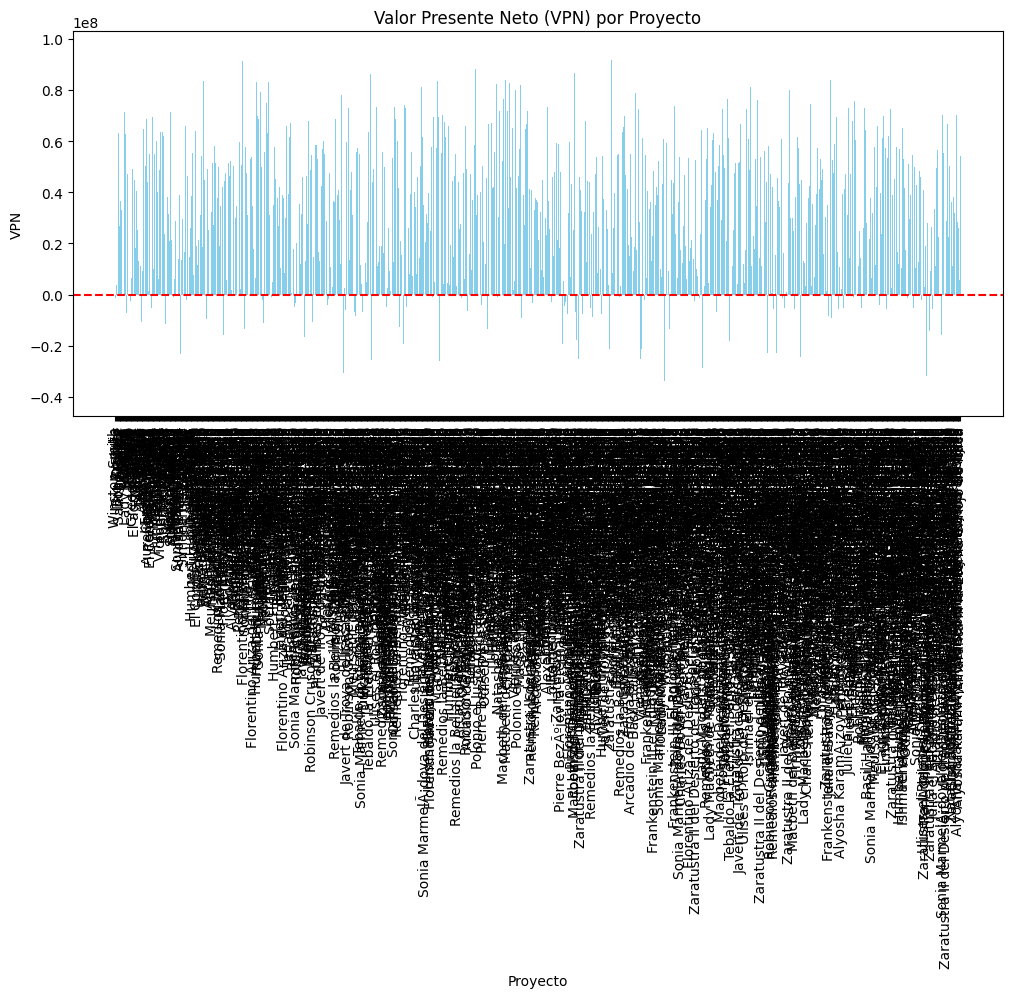

<ipython-input-8-b0ddacd3d3a8>:23: UserWarning: Glyph 154 (\x9a) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-b0ddacd3d3a8>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


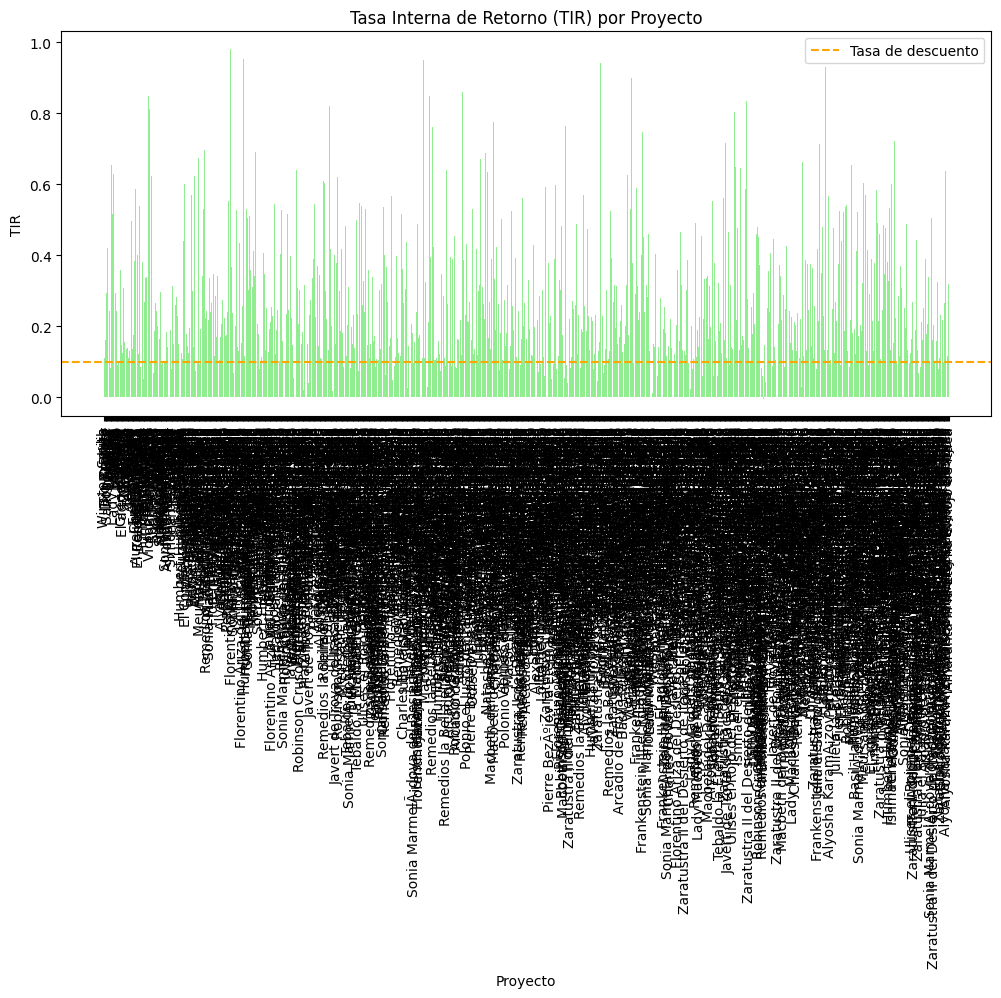

In [8]:
import matplotlib.pyplot as plt

# Gráfico de barras para el VPN
plt.figure(figsize=(12, 5))
plt.bar(df['Proyecto'], df['VPN'], color='skyblue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Valor Presente Neto (VPN) por Proyecto')
plt.xlabel('Proyecto')
plt.ylabel('VPN')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Gráfico de barras para la TIR
plt.figure(figsize=(12, 5))
plt.bar(df['Proyecto'], df['TIR'], color='lightgreen')
plt.axhline(0.10, color='orange', linestyle='--', label='Tasa de descuento')
plt.title('Tasa Interna de Retorno (TIR) por Proyecto')
plt.xlabel('Proyecto')
plt.ylabel('TIR')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#Paso 5.1: Visualizar los proyectos más rentables
##Como el gráfico anterior mostraba demasiada información y era difícil de leer, decidí hacer nuevas visualizaciones con los datos más importantes.

##Primero mostré los 10 proyectos con el VPN más alto y luego los 10 proyectos con mayor TIR. Esto me ayudó a ver rápidamente cuáles eran los más rentables.

##También filtré los proyectos que realmente valen la pena, es decir, los que tienen un VPN mayor que cero y una TIR superior al 10%. Así obtuve un grupo reducido de proyectos recomendables.

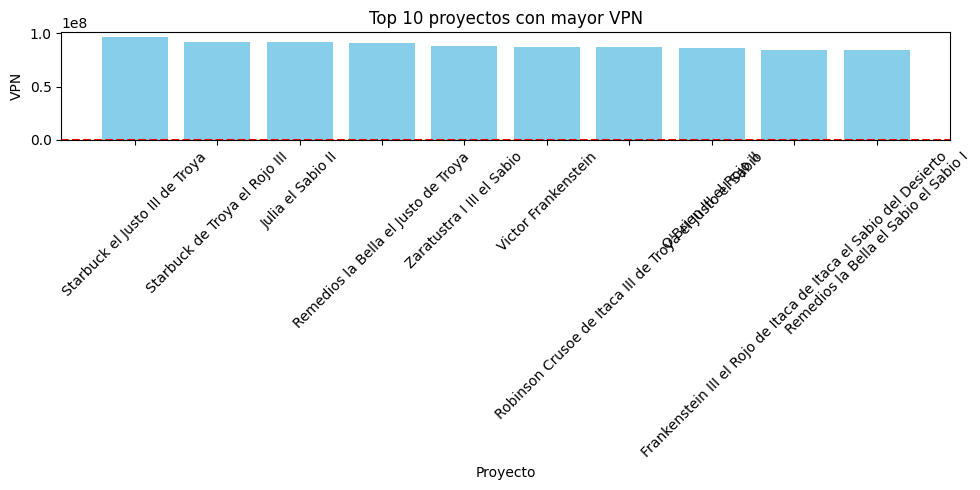

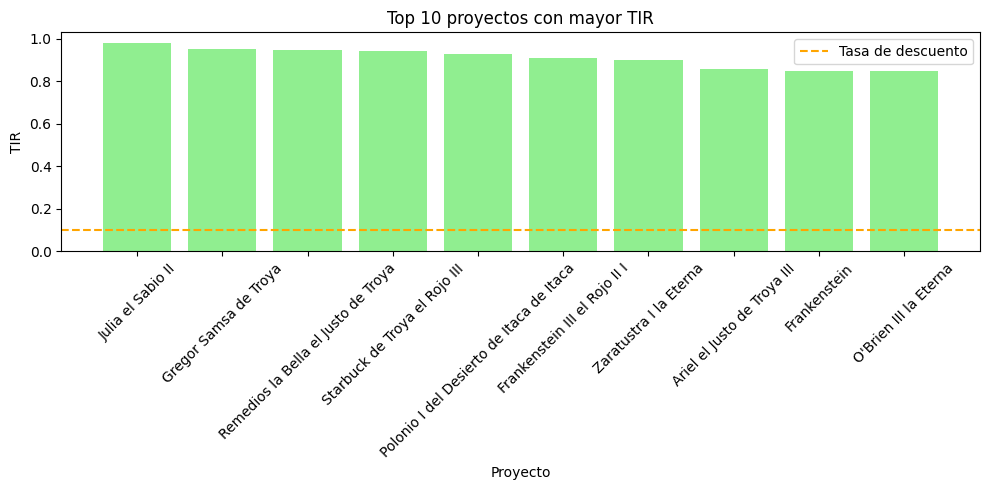

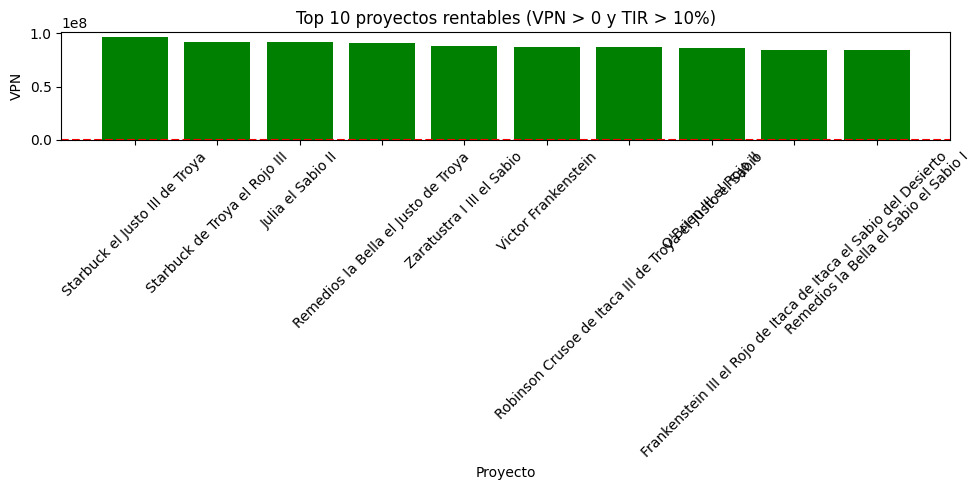

In [9]:
import matplotlib.pyplot as plt

# Top 10 proyectos con mayor VPN
top_vpn = df.nlargest(10, 'VPN')

plt.figure(figsize=(10, 5))
plt.bar(top_vpn['Proyecto'], top_vpn['VPN'], color='skyblue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Top 10 proyectos con mayor VPN')
plt.xlabel('Proyecto')
plt.ylabel('VPN')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 proyectos con mayor TIR
top_tir = df.nlargest(10, 'TIR')

plt.figure(figsize=(10, 5))
plt.bar(top_tir['Proyecto'], top_tir['TIR'], color='lightgreen')
plt.axhline(0.10, color='orange', linestyle='--', label='Tasa de descuento')
plt.title('Top 10 proyectos con mayor TIR')
plt.xlabel('Proyecto')
plt.ylabel('TIR')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Filtrar los proyectos que sí son rentables
proyectos_rentables = df[(df['VPN'] > 0) & (df['TIR'] > 0.10)]

# De esos, mostrar solo los 10 con mayor VPN
proyectos_rentables_top = proyectos_rentables.nlargest(10, 'VPN')

plt.figure(figsize=(10, 5))
plt.bar(proyectos_rentables_top['Proyecto'], proyectos_rentables_top['VPN'], color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('Top 10 proyectos rentables (VPN > 0 y TIR > 10%)')
plt.xlabel('Proyecto')
plt.ylabel('VPN')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#Paso 6: Crear un menú interactivo
##Para hacer más fácil la navegación del análisis, creé un menú interactivo usando la librería ipywidgets. Esto permite que cualquier persona pueda ver los resultados sin tener que ejecutar cada celda manualmente.

##El menú tiene cuatro botones: uno para ver los datos originales, otro para ver los indicadores financieros (VPN y TIR), uno más para ver los gráficos de los proyectos rentables, y un botón de salir que limpia la pantalla.

##También se ordeno el diseño para que los botones aparezcan en forma vertical, como una lista ordenada. Esto hace que el notebook sea más amigable, claro y fácil de usar

In [11]:
# Importar librerías necesarias
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Mostrar las primeras filas del DataFrame
def ver_datos(b):
    clear_output()  # Limpiar pantalla anterior
    display(menu_box)  # Mostrar de nuevo el menú
    display(df.head())  # Mostrar los datos

# Mostrar los indicadores VPN y TIR
def ver_indicadores(b):
    clear_output()
    display(menu_box)
    display(df[['Proyecto', 'VPN', 'TIR']])  # Mostrar solo columnas clave

# Graficar proyectos rentables (VPN > 0 y TIR > 10%)
def ver_graficos(b):
    clear_output()
    display(menu_box)
    proyectos_rentables = df[(df['VPN'] > 0) & (df['TIR'] > 0.10)]  # Filtrar proyectos buenos
    plt.figure(figsize=(10, 5))
    plt.bar(proyectos_rentables['Proyecto'], proyectos_rentables['VPN'], color='green')
    plt.axhline(0, color='red', linestyle='--')  # Línea base de VPN=0
    plt.title('Proyectos rentables (VPN positivo y TIR > 10%)')
    plt.xlabel('Proyecto')
    plt.ylabel('VPN')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Cerrar menú y limpiar pantalla
def salir(b):
    clear_output()

# ======== CREACIÓN DE LOS BOTONES ========

# Crear botón para cada acción
btn_datos = widgets.Button(description='Ver Datos', button_style='primary')        # Azul
btn_indicadores = widgets.Button(description='Ver Indicadores', button_style='info')  # Celeste
btn_graficos = widgets.Button(description='Ver Gráficos', button_style='success')    # Verde
btn_salir = widgets.Button(description='Salir', button_style='danger')            # Rojo

# Asignar función a cada botón
btn_datos.on_click(ver_datos)
btn_indicadores.on_click(ver_indicadores)
btn_graficos.on_click(ver_graficos)
btn_salir.on_click(salir)

# Agrupar los botones con un título
menu_box = widgets.VBox([
    widgets.HTML(value="<b>Seleccionar una opción:</b>"),
    btn_datos,
    btn_indicadores,
    btn_graficos,
    btn_salir
])

# Mostrar el menú en el notebook
display(menu_box)




#Sustentación

##Durante este análisis se evaluaron varios proyectos de inversión utilizando herramientas de programación en Python, principalmente con las librerías pandas, numpy_financial, matplotlib y ipywidgets. El objetivo fue determinar qué proyectos son rentables aplicando dos indicadores financieros fundamentales: el Valor Presente Neto (VPN) y la Tasa Interna de Retorno (TIR).

##Primero se calculó el VPN para cada proyecto, considerando la inversión inicial y los flujos de caja proyectados a 10 años. Un VPN positivo indica que el valor actual de los ingresos esperados supera el costo de la inversión, lo que lo convierte en una buena opción desde el punto de vista financiero y presupuestal.

##Luego se calculó la TIR, que representa el rendimiento porcentual del proyecto. Si la TIR es mayor que la tasa de descuento del 10%, significa que el proyecto supera el costo de oportunidad del capital y, por lo tanto, es rentable.

##Al comparar ambos indicadores, se identificaron proyectos que tienen VPN positivo y TIR superior al 10%, lo que confirma su viabilidad. Esta coincidencia también valida que los dos indicadores se complementan en la toma de decisiones de inversión, siendo útiles tanto para evaluar el valor económico absoluto (VPN) como la eficiencia relativa del capital invertido (TIR).

##Además, se filtraron y graficaron los proyectos más rentables, lo que permitió visualizar de forma clara cuáles representan las mejores oportunidades. Esta visualización refuerza los criterios de selección y priorización en un entorno real de presupuestación.

##En conclusión, el ejercicio no solo permitió aplicar conocimientos técnicos sobre evaluación financiera, sino también automatizar el proceso de análisis con herramientas modernas, facilitando una toma de decisiones más informada, eficiente y alineada con la gestión de costos y presupuestos empresariales..

